## Questão 1
Obtenha os seguintes dados no IPEADATA http://www.ipeadata.gov.br/Default.aspx:

• PIB - preços de mercado - índice real encadeado dessazonalizado (média 1995 = 100).
• Consumo final - famílias - índice real encadeado dessazonalizado (média 1995 = 100).
• Formação bruta de capital fixo - índice real encadeado dessazonalizado (média 1995 =
100).
• PIB - consumo final - APU - índice real encadeado dessazonalizado (média 1995 =
100). Esta é a série de gastos do governo.
• Indicadores Industriais - horas trabalhadas - indústria - índice dessazonalizado (média
2006 = 100).

Você precisa transformar essa série para a frequência trimestral, para isso
tire a média simples entre os meses que compõem o trimestre. Trimestre 1 = média
dos meses de janeiro, fevereiro e março, Trimestre 2=abril,.. etc.


### Tratamento e limpeza dos dados coletados

In [3]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter


In [4]:
pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - PREÇOS DE MERCADO.csv",  delimiter=';')
consumo_familiar = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - CONSUMO FINAL FAMILIAS.csv")
formacao_capital = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\FORMAÇÃO BRUTA DE CAPITAL FIXO.csv",  delimiter=';')
gastos_governo = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - GASTOS DO GOVERNO.csv",  delimiter=';')
horas_trabalhadas = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\HORAS TRABALHADAS - INDÚSTRIA.csv", delimiter=';')


<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1507538151.py:1: SyntaxWarning: invalid escape sequence '\{'
  pib = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - PREÇOS DE MERCADO.csv",  delimiter=';')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1507538151.py:2: SyntaxWarning: invalid escape sequence '\{'
  consumo_familiar = pd.read_csv("M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 1\Base de dados\PIB - CONSUMO F

In [5]:
# Removendo colunas e linhas vazias
for df in [pib, consumo_familiar, formacao_capital, gastos_governo, horas_trabalhadas]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True, errors='ignore')

In [6]:
consumo_familiar.columns = ['Trimestre', 'Despesa_familiar']

for df in [pib, consumo_familiar, formacao_capital, gastos_governo]:
    df['Trimestre'] = pd.to_datetime(df['Trimestre'], errors='coerce')
    df.dropna(subset=['Trimestre'], inplace=True) 
    df.drop_duplicates(subset=['Trimestre'], inplace=True)
    
df_temp = pd.merge(pib, gastos_governo, on='Trimestre', how='inner')
df_temp = pd.merge(df_temp, formacao_capital, on='Trimestre', how='inner')
df = pd.merge(df_temp, consumo_familiar, on='Trimestre', how='inner')

# Renomeando as colunas para facilitar a manipulação
df.columns = ['Data',
             'PIB_Mercado',
             'PIB_gastos_gov',
             'PIB_capital_fixo',
             'PIB_familias']

df.info()

C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1643003858.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trimestre'] = pd.to_datetime(df['Trimestre'], errors='coerce')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1643003858.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trimestre'] = pd.to_datetime(df['Trimestre'], errors='coerce')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1643003858.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trimestre'] = pd.to_datetime(df['Trimestre'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              115 non-null    datetime64[ns]
 1   PIB_Mercado       115 non-null    float64       
 2   PIB_gastos_gov    115 non-null    float64       
 3   PIB_capital_fixo  115 non-null    float64       
 4   PIB_familias      115 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_7544\1643003858.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trimestre'] = pd.to_datetime(df['Trimestre'], errors='coerce')


In [7]:
df['Data'] = pd.to_datetime(df['Data'])
df['Trimestre-Ano'] = df['Data'].dt.strftime('T%m %Y')

df.head(12)

,Data,PIB_Mercado,PIB_gastos_gov,PIB_capital_fixo,PIB_familias,Trimestre-Ano
0,1996-01-01,99.40,99.16,96.84,98.630029,T01 1996
1,1996-02-01,100.66,100.76,98.71,100.877926,T02 1996
2,1996-03-01,104.15,104.27,102.41,103.932393,T03 1996
3,1996-04-01,103.38,88.51,106.78,109.173637,T04 1996
4,1997-01-01,104.42,100.33,107.69,106.420582,T01 1997
5,1997-02-01,105.00,99.93,109.20,106.923325,T02 1997
6,1997-03-01,106.13,98.37,111.34,106.086136,T03 1997
7,1997-04-01,107.22,99.00,110.61,106.047612,T04 1997
8,1998-01-01,105.10,101.44,111.21,105.904056,T01 1998
9,1998-02-01,106.81,102.12,111.62,105.742701,T02 1998


In [8]:
horas_trabalhadas.columns = ['Data', 'Horas_trabalhadas_industria']

In [9]:
horas_trabalhadas.head(17)

,Data,Horas_trabalhadas_industria
0,1992-01,"124,3817844"
1,1992-02,"126,063564"
2,1992-03,"120,1411127"
3,1992-04,"121,9130293"
4,1992-05,"121,2950587"
5,1992-06,"120,9101421"
6,1992-07,"121,8631238"
7,1992-08,"120,2500829"
8,1992-09,"120,2530487"
9,1992-10,"119,7628804"


In [10]:
def converter_data(value):
    try:
        value_str = str(value).strip()
        if '-' in value_str:
            ano, mes = map(int, value_str.split('-'))
            return pd.Timestamp(year=ano, month=mes, day=1)
        else:
            return pd.NaT
    except ValueError:
        return pd.NaT 

horas_trabalhadas['Data'] = horas_trabalhadas['Data'].apply(converter_data)

def determinar_trimestre(mes):
    if mes in [1, 2, 3]:
        return 'T01'
    elif mes in [4, 5, 6]:
        return 'T02'
    elif mes in [7, 8, 9]:
        return 'T03'
    elif mes in [10, 11, 12]:
        return 'T04'

horas_trabalhadas['Trimestre'] = horas_trabalhadas['Data'].dt.month.apply(determinar_trimestre)
horas_trabalhadas['Trimestre-Ano'] = horas_trabalhadas['Trimestre'] + ' ' + horas_trabalhadas['Data'].dt.year.astype(str)

print(horas_trabalhadas.head(12))
print("Valores NaT encontrados:", horas_trabalhadas['Data'].isna().sum())

         Data Horas_trabalhadas_industria Trimestre Trimestre-Ano
0  1992-01-01                 124,3817844       T01      T01 1992
1  1992-02-01                  126,063564       T01      T01 1992
2  1992-03-01                 120,1411127       T01      T01 1992
3  1992-04-01                 121,9130293       T02      T02 1992
4  1992-05-01                 121,2950587       T02      T02 1992
5  1992-06-01                 120,9101421       T02      T02 1992
6  1992-07-01                 121,8631238       T03      T03 1992
7  1992-08-01                 120,2500829       T03      T03 1992
8  1992-09-01                 120,2530487       T03      T03 1992
9  1992-10-01                 119,7628804       T04      T04 1992
10 1992-11-01                 119,7949935       T04      T04 1992
11 1992-12-01                 115,5759598       T04      T04 1992
Valores NaT encontrados: 0


In [11]:
# Convertendo valores para float
horas_trabalhadas['Horas_trabalhadas_industria'] = horas_trabalhadas['Horas_trabalhadas_industria'].astype(str)
horas_trabalhadas['Horas_trabalhadas_industria'] = horas_trabalhadas['Horas_trabalhadas_industria'].str.replace(',','.', regex = False).astype(float)

horas_trabalhadas.head(18)

,Data,Horas_trabalhadas_industria,Trimestre,Trimestre-Ano
0,1992-01-01,124.381784,T01,T01 1992
1,1992-02-01,126.063564,T01,T01 1992
2,1992-03-01,120.141113,T01,T01 1992
3,1992-04-01,121.913029,T02,T02 1992
4,1992-05-01,121.295059,T02,T02 1992
5,1992-06-01,120.910142,T02,T02 1992
6,1992-07-01,121.863124,T03,T03 1992
7,1992-08-01,120.250083,T03,T03 1992
8,1992-09-01,120.253049,T03,T03 1992
9,1992-10-01,119.762880,T04,T04 1992


In [12]:
# Media das horas trabalhadas
media_trimestral = horas_trabalhadas.groupby('Trimestre-Ano', as_index=False).agg({
    'Horas_trabalhadas_industria': 'mean'
})

# Ordenação do Trimestre-Ano está em ordem alfabética, deve-se reordenar
media_trimestral['Ano'] = media_trimestral['Trimestre-Ano'].str.split().str[1].astype(int)
media_trimestral['Trimestre_Numérico'] = media_trimestral['Trimestre-Ano'].str.split().str[0].str[-2:].astype(int)

# Ordenar com base no ano e no trimestre
media_trimestral = media_trimestral.sort_values(by=['Ano', 'Trimestre_Numérico']).drop(columns=['Ano', 'Trimestre_Numérico'])
media_trimestral.reset_index(drop=True, inplace=True)
media_trimestral.columns = ['Trimestre-Ano', 'horas_trabalhadas']

print(media_trimestral.head(12))

   Trimestre-Ano  horas_trabalhadas
0       T01 1992         123.528820
1       T02 1992         121.372743
2       T03 1992         120.788752
3       T04 1992         118.377945
4       T01 1993         118.840270
5       T02 1993         119.670877
6       T03 1993         119.856767
7       T04 1993         118.164887
8       T01 1994         118.805091
9       T02 1994         118.150705
10      T03 1994         117.681663
11      T04 1994         122.794170


Siga os seguintes passos:

### i - Aplique o **logaritmo natural** nas séries. Feito isso, use o filtro HP (Hodrick–Prescott)1 nas séries em logaritmo e obtenha a tendência de cada série. Faça um gráfico para cada série junto com sua tendência estimada pelo filtro HP.

In [13]:
# Aplicar o logaritmo natural
df['PIB_Mercado_log'] = np.log(df['PIB_Mercado'])
df['PIB_familias_log'] = np.log(df['PIB_familias'])
df['PIB_capital_fixo_log'] = np.log(df['PIB_capital_fixo'])
df['PIB_gastos_gov_log'] = np.log(df['PIB_gastos_gov'])
media_trimestral['horas_trabalhadas_log'] = np.log(media_trimestral['horas_trabalhadas'])

print(df.head())


        Data  PIB_Mercado  PIB_gastos_gov  PIB_capital_fixo  PIB_familias  \
0 1996-01-01        99.40           99.16             96.84     98.630029   
1 1996-02-01       100.66          100.76             98.71    100.877926   
2 1996-03-01       104.15          104.27            102.41    103.932393   
3 1996-04-01       103.38           88.51            106.78    109.173637   
4 1997-01-01       104.42          100.33            107.69    106.420582   

  Trimestre-Ano  PIB_Mercado_log  PIB_familias_log  PIB_capital_fixo_log  \
0      T01 1996         4.599152          4.591376              4.573060   
1      T02 1996         4.611749          4.613911              4.592186   
2      T03 1996         4.645832          4.643741              4.628984   
3      T04 1996         4.638412          4.692940              4.670771   
4      T01 1997         4.648421          4.667399              4.679257   

   PIB_gastos_gov_log  
0            4.596735  
1            4.612741  
2       

In [14]:
# O filtro HP é usado para decompor a série em tendência e componente cíclico
def aplicar_filtro_hp(serie):
    ciclo, tendencia = hpfilter(serie, lamb=1600) # lambda=1600 é padrão para dados trimestrais
    return ciclo, tendencia

df['PIB_Mercado_ciclo'], df['PIB_Mercado_tendencia'] = aplicar_filtro_hp(df['PIB_Mercado_log'])
df['PIB_familias_ciclo'], df['PIB_familias_tendencia'] = aplicar_filtro_hp(df['PIB_familias_log'])
df['PIB_capital_fixo_ciclo'], df['PIB_capital_fixo_tendencia'] = aplicar_filtro_hp(df['PIB_capital_fixo_log'])
df['PIB_gastos_gov_ciclo'], df['PIB_gastos_gov_tendencia'] = aplicar_filtro_hp(df['PIB_gastos_gov_log'])
media_trimestral['horas_trabalhadas_ciclo'], media_trimestral['horas_trabalhadas_tendencia'] = aplicar_filtro_hp(media_trimestral['horas_trabalhadas_log'])


In [15]:
def plot_tendencia(data, original, tendencia, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.subplot(2, 1, 1)
    plt.plot(data, original, label='Logaritmo da série original', color='midnightblue')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='red')
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.ylabel('Logaritmo Natural', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.grid(True, linestyle='-', alpha=0.3)
    plt.legend()
    plt.show()

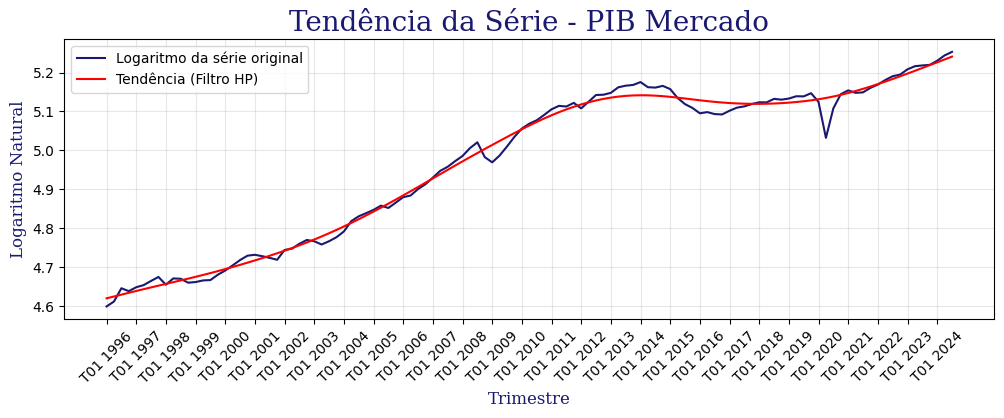

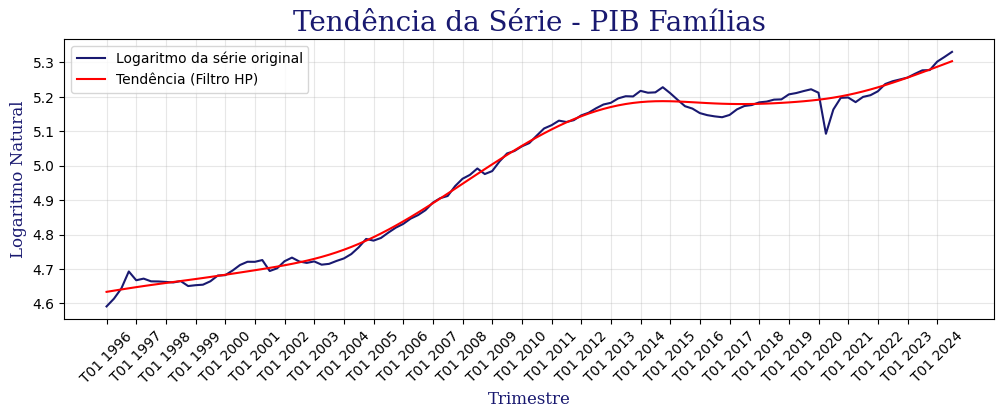

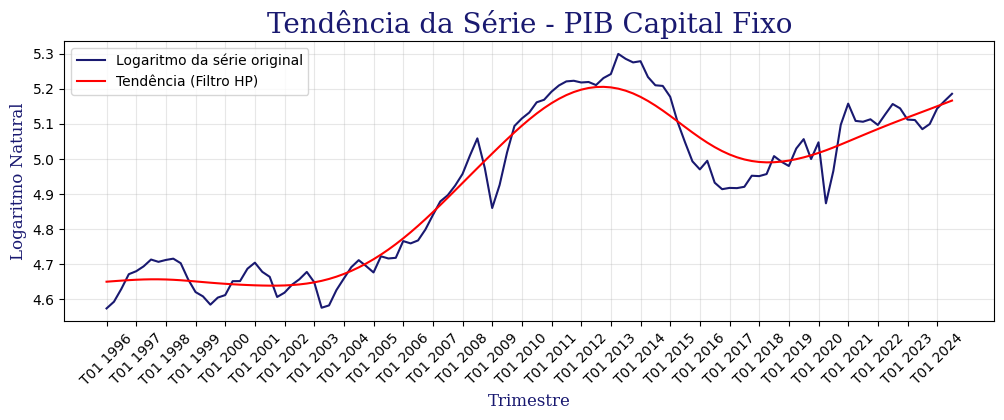

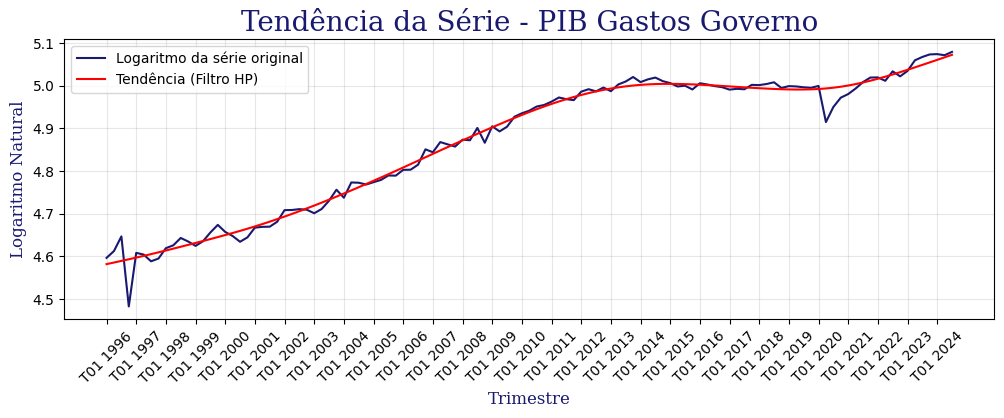

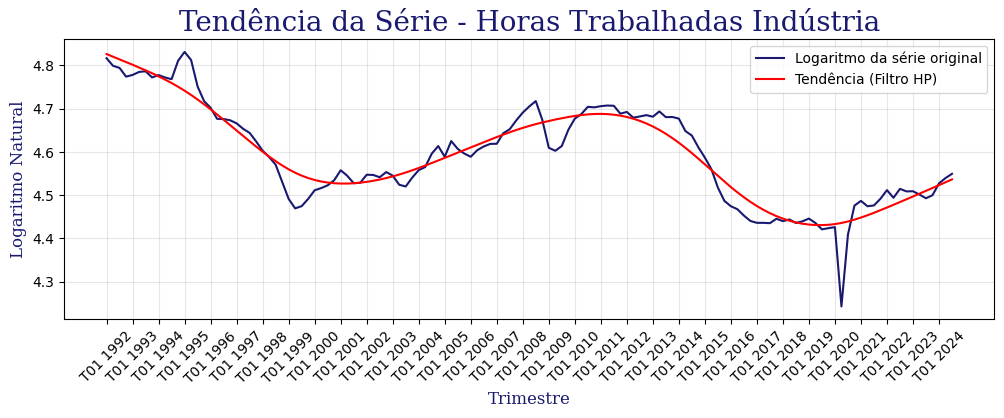

In [16]:
# Gráfico para cada série junto com sua tendência estimada pelo filtro HP
plot_tendencia(df['Trimestre-Ano'], df['PIB_Mercado_log'], df['PIB_Mercado_tendencia'], 'PIB Mercado')
plot_tendencia(df['Trimestre-Ano'], df['PIB_familias_log'], df['PIB_familias_tendencia'], 'PIB Famílias')
plot_tendencia(df['Trimestre-Ano'], df['PIB_capital_fixo_log'], df['PIB_capital_fixo_tendencia'], 'PIB Capital Fixo')
plot_tendencia(df['Trimestre-Ano'], df['PIB_gastos_gov_log'], df['PIB_gastos_gov_tendencia'], 'PIB Gastos Governo')
plot_tendencia(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_log'], media_trimestral['horas_trabalhadas_tendencia'], 'Horas Trabalhadas Indústria')

### ii Obtenha o componente cíclico de cada série. Faça um gráfico para cada componente cíclico de cada série. Identifique episódios históricos associando-os aos resultados encontrados.


In [17]:
def graficos(data, original, tendencia, ciclo, titulo):
    plt.figure(figsize=(12, 8))
    
    # Série original e tendência
    plt.subplot(2, 1, 1)
    plt.plot(data, original, label='Original', color='blue')
    plt.plot(data, tendencia, label='Tendência (Filtro HP)', color='red')
    plt.title(f'Tendência da Série - {titulo}',  fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.grid(True, linestyle='-', alpha=0.3)
    plt.legend()
    
    # Componente cíclico
    plt.subplot(2, 1, 2)
    plt.plot(data, ciclo, label='Componente Cíclico', color='green')
    plt.axhline(0, color='black', linestyle='--', alpha=0.6)
    plt.title(f'Componente Cíclico - {titulo}', fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.legend()
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.grid(True, linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

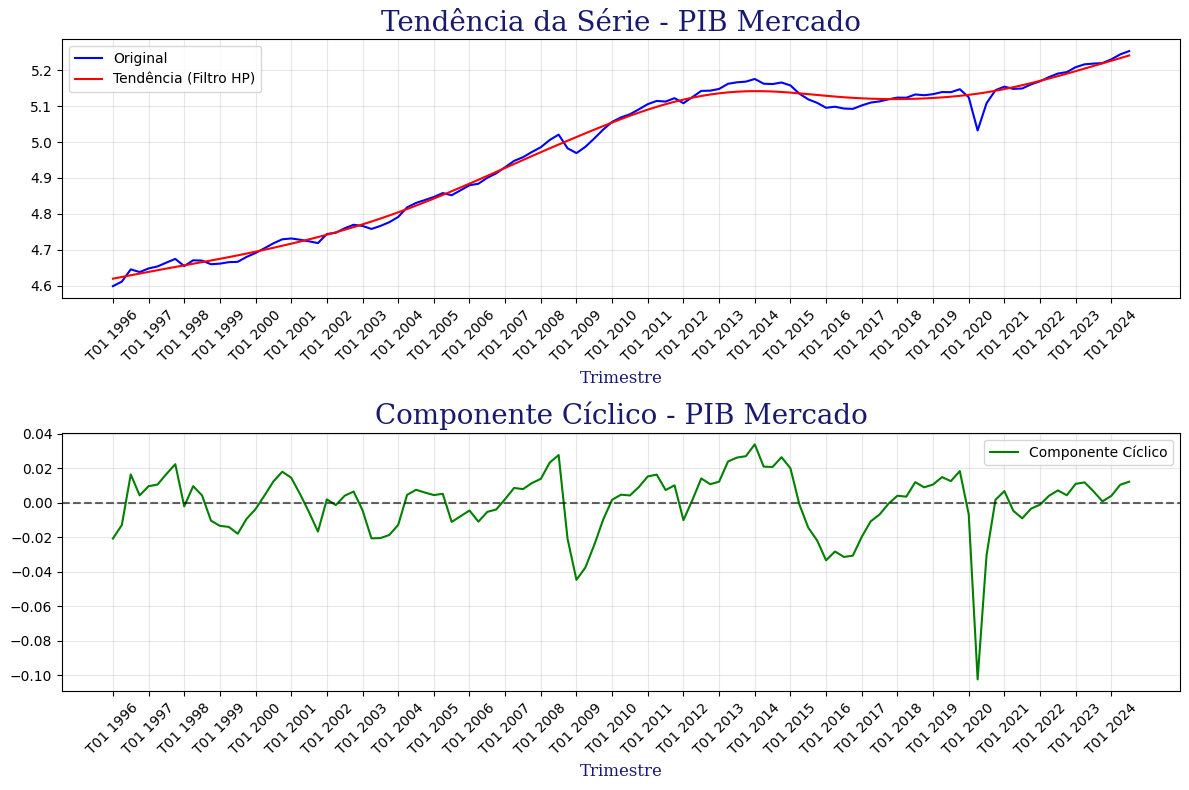

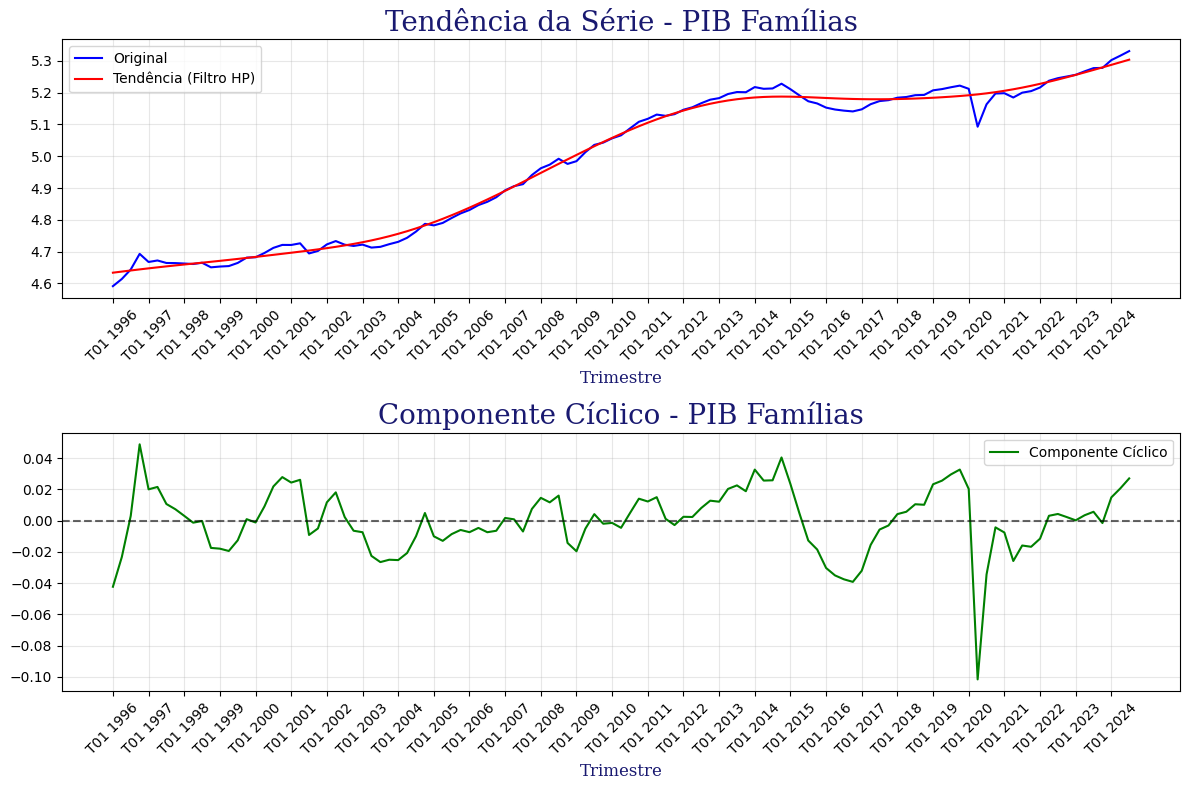

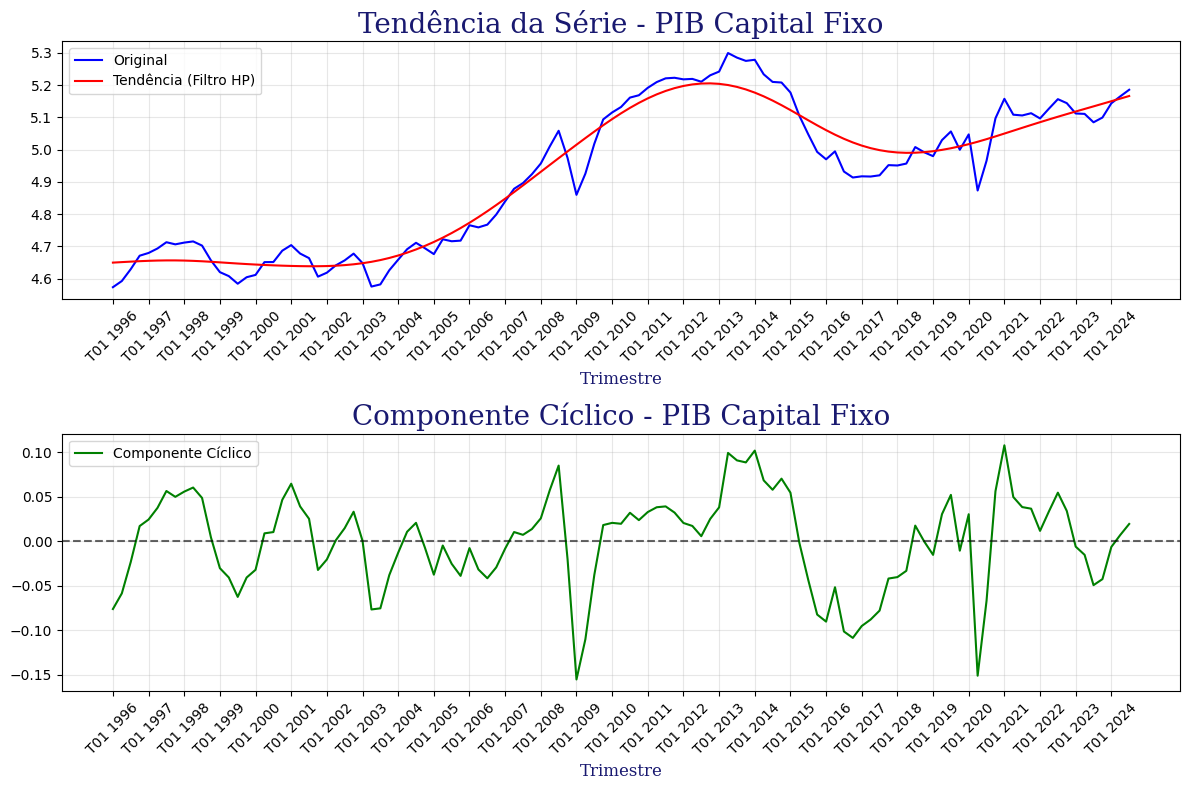

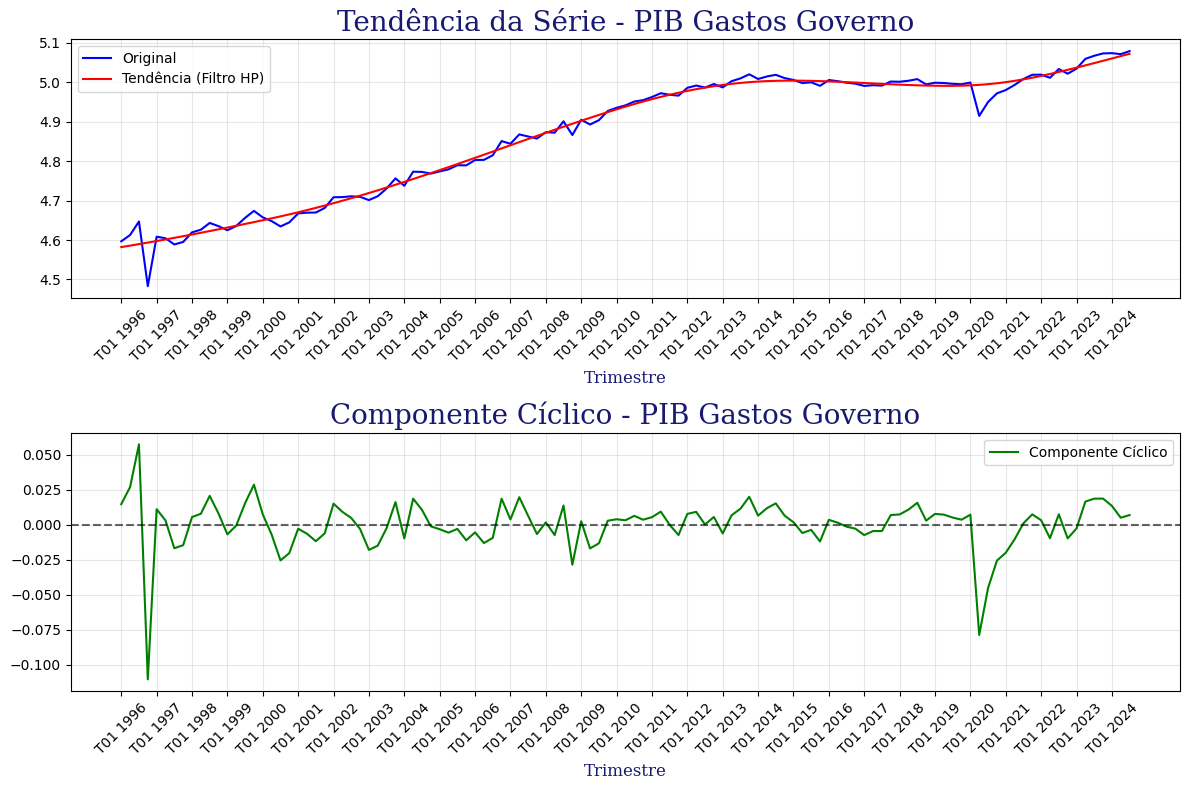

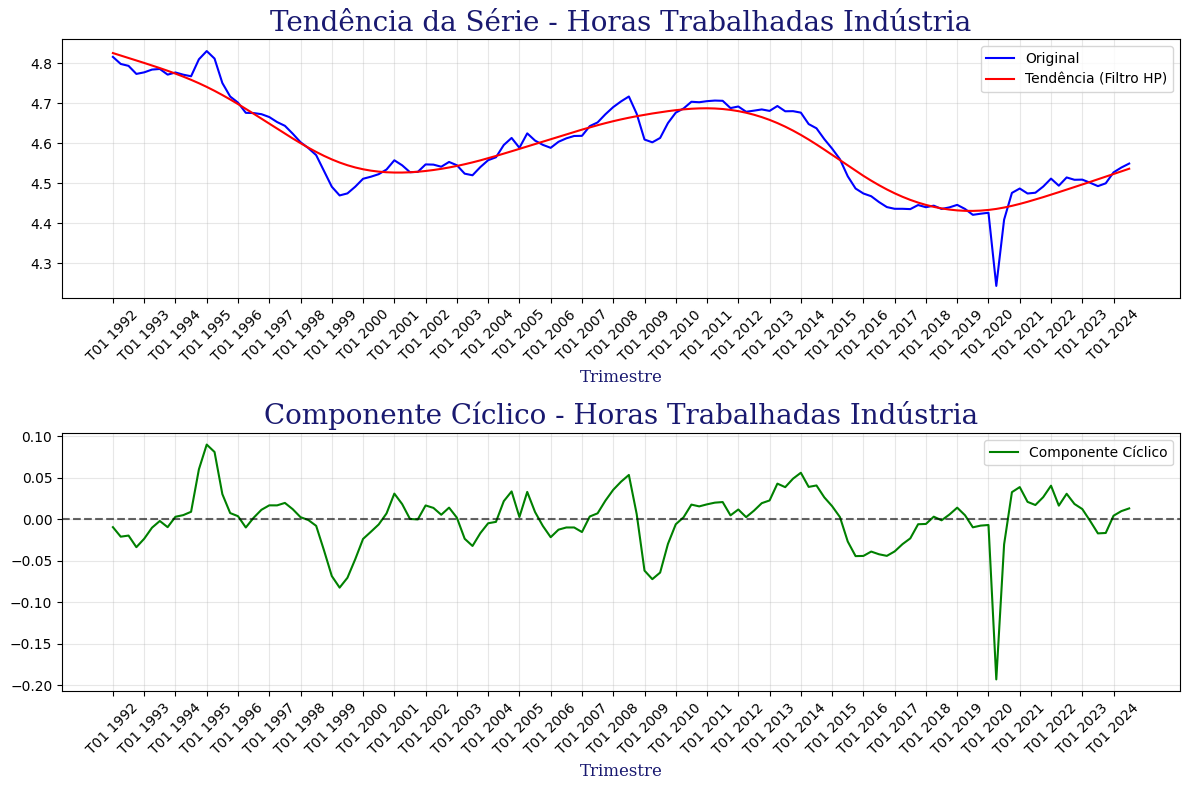

In [18]:
# Plotar para cada série
graficos(df['Trimestre-Ano'], df['PIB_Mercado_log'], df['PIB_Mercado_tendencia'], df['PIB_Mercado_ciclo'], 'PIB Mercado')
graficos(df['Trimestre-Ano'], df['PIB_familias_log'], df['PIB_familias_tendencia'], df['PIB_familias_ciclo'], 'PIB Famílias')
graficos(df['Trimestre-Ano'], df['PIB_capital_fixo_log'], df['PIB_capital_fixo_tendencia'], df['PIB_capital_fixo_ciclo'], 'PIB Capital Fixo')
graficos(df['Trimestre-Ano'], df['PIB_gastos_gov_log'], df['PIB_gastos_gov_tendencia'], df['PIB_gastos_gov_ciclo'], 'PIB Gastos Governo')
graficos(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_log'], media_trimestral['horas_trabalhadas_tendencia'], media_trimestral['horas_trabalhadas_ciclo'], 'Horas Trabalhadas Indústria')

In [19]:
def plot_ciclo(data, ciclo, titulo):
    plt.figure(figsize=(10, 6))
    plt.plot(data, ciclo, label='Componente Cíclico', color='darkgreen')
    plt.axhline(0, color='black', linestyle='--', alpha=0.7)
    plt.title(f'Componente Cíclico da Série: - {titulo}', fontdict={'family':'serif','color':'darkgreen','size':20})
    plt.xlabel('Trimestre', fontdict={'family':'serif','color':'darkgreen','size':12})
    plt.xticks(range(0, len(data), 4), data[::4], rotation=45)
    plt.ylabel('Ciclo', fontdict={'family':'serif','color':'darkgreen','size':12})
    plt.legend()
    plt.grid(True, linestyle='-', alpha=0.7)
    
    plt.show()

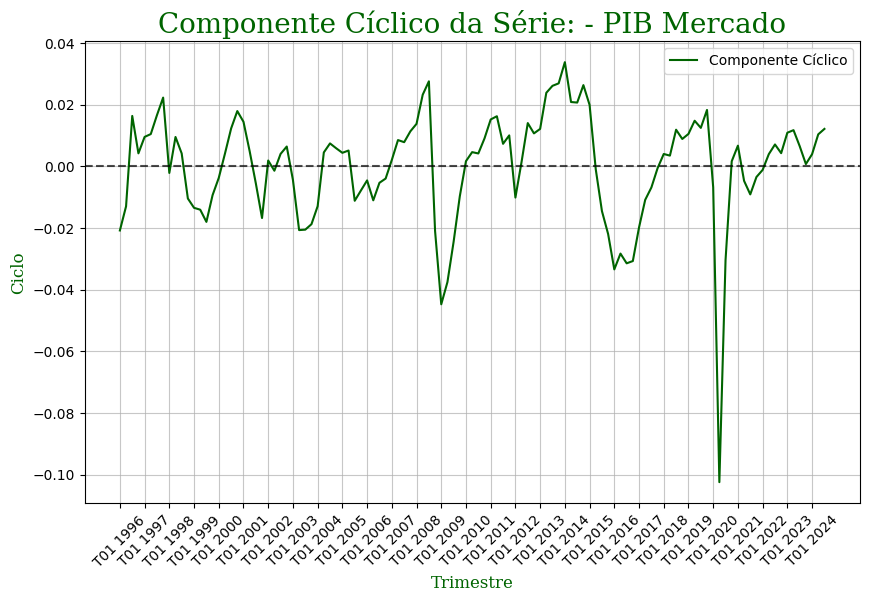

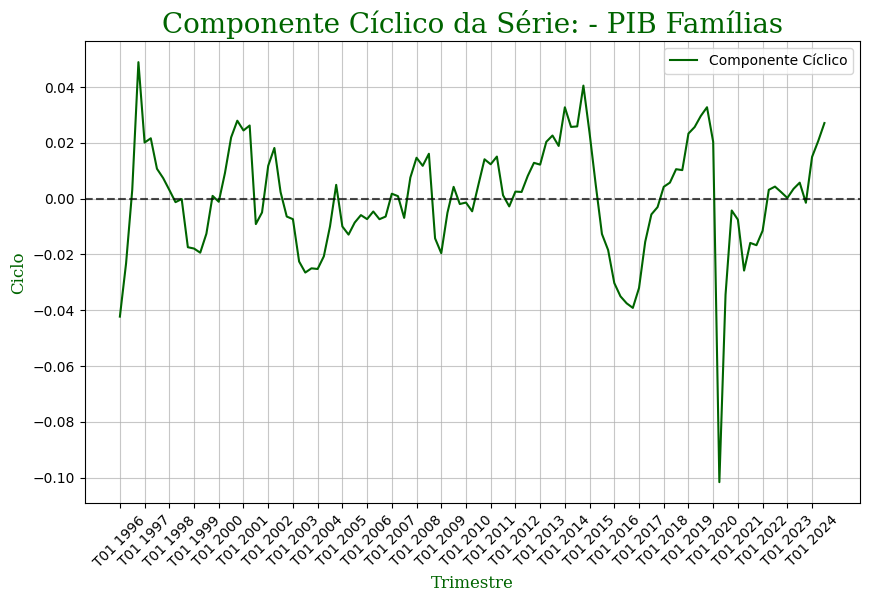

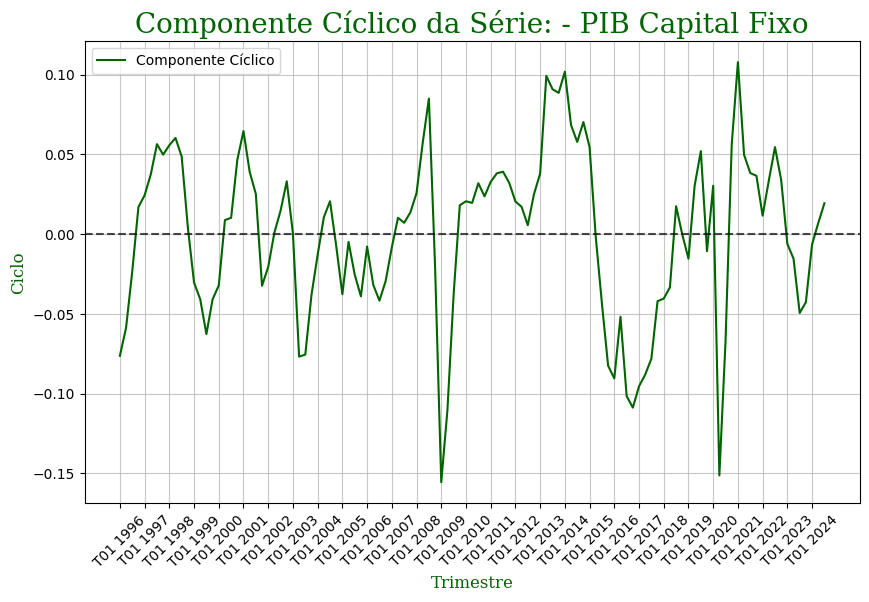

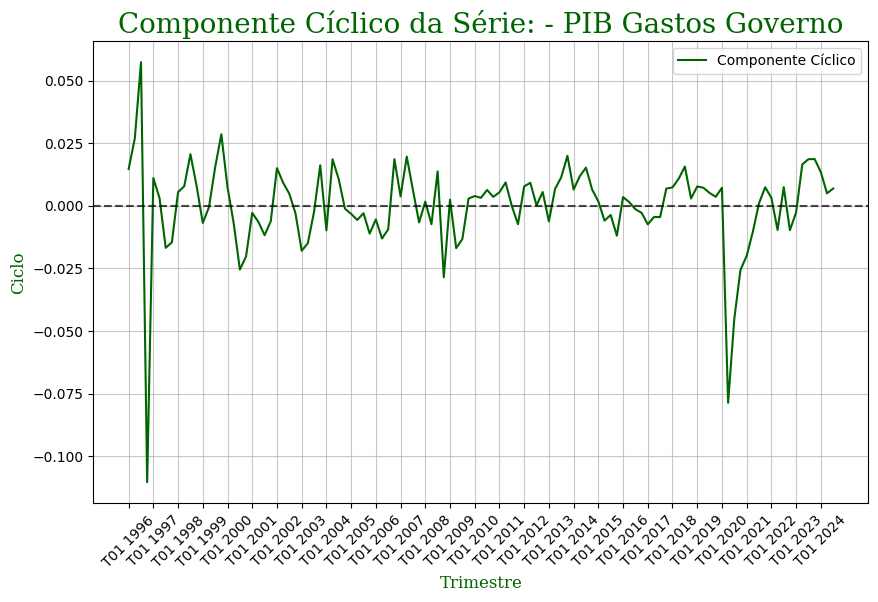

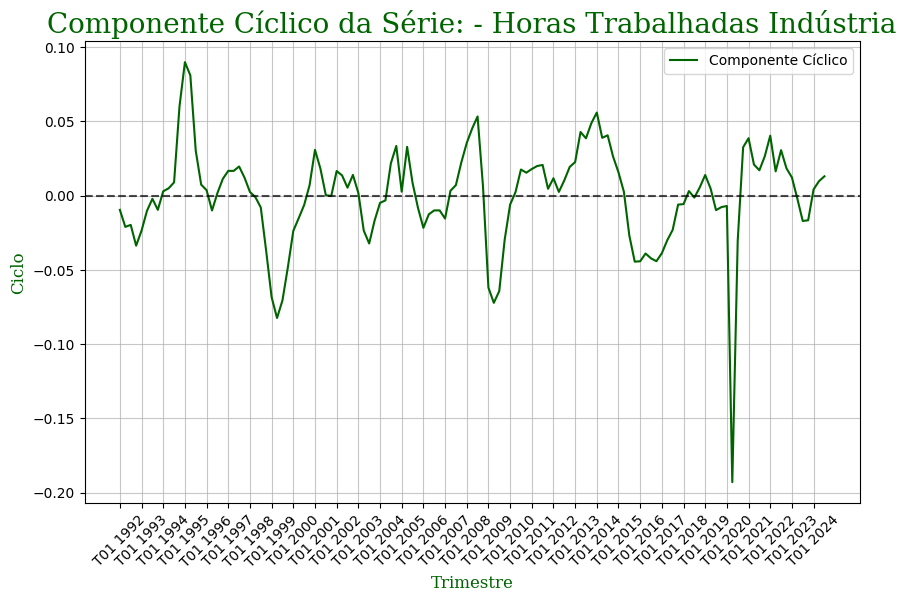

In [20]:
# Componente cíclico de cada série
plot_ciclo(df['Trimestre-Ano'], df['PIB_Mercado_ciclo'], 'PIB Mercado')
plot_ciclo(df['Trimestre-Ano'], df['PIB_familias_ciclo'], 'PIB Famílias')
plot_ciclo(df['Trimestre-Ano'], df['PIB_capital_fixo_ciclo'], 'PIB Capital Fixo')
plot_ciclo(df['Trimestre-Ano'],  df['PIB_gastos_gov_ciclo'], 'PIB Gastos Governo')
plot_ciclo(media_trimestral['Trimestre-Ano'], media_trimestral['horas_trabalhadas_ciclo'], 'Horas Trabalhadas Indústria')

***Identifique episódios históricos associando-os aos resultados encontrados.***

No primeiro trimestre de 1999 há a crise da desvalorização do real, uma crise cambial que afetou negativamente o PIB do país, assim como todas as séries históricas analisadas. Houve a queda do PIB (preços de mercados) associada à instabilidade cambial e aumento dos juros para conter a inflação. Ademais, há a queda no consumo familiar devido à redução do poder de compra e aumento da incerteza, assim como a queda nos investimentos, com a retração industrial há a redução das horas trabalhadas. Dessa forma, percebe-se uma expansão relativa nos gastos da administração pública na tentativa de reverter e minimizar os efeitos da crise.

Final de 2002 o PIB fecha em uma queda herdada por mais da metade de 2003, onde há 
a busca pela recuperação. Logo, há queda seguida de estagnação do consumo familiar devido aos 
juros elevados e alta inflação, investimentos muito baixos até o terceiro trimestre, onde se 
recupera lentamente com melhorias das expectativas econômicas do governo Lula. Os gastos do 
governo iniciam em 2003 numa baixa devido à mudança de presidente, mas que logo se expande 
para estabilizar a economia em frente a crise de expectativas.

A Crise Financeira Global de 2008-2009 é facilmente percebida nas séries analisadas, afirmando 
que o Brasil está na lista dos países afetados econômica e socialmente de forma considerável, 
percebe-se a partir do terceiro trimestre de 2008 a redução do PIB que pode se reerguer apenas
no decorrer de 2009. Com a incerteza global, houve redução do consumo familiar, mas políticas 
fiscais ajudaram a manter estável até o início de 2009.  Com a alta do desemprego e baixa na 
renda, as horas trabalhadas reduziram drasticamente, tal como a forte contração dos 
investimentos devido à queda na confiança e dificuldades de crédito.

A grande crise econômica de 2014-2016 no Brasil resultou na baixa do PIB devido à crise fiscal, 
instabilidade política, e perda de confiança, com uma grande taxa de desocupação no país, há 
queda do consumo devido à renda real baixa e falta de confiança levou a contração dos 
investimentos. Devido à alta dívida pública e crise fiscal, os gastos do governo têm cescimento 
limitado. 

De fato, o maior outlier das séries analisadas é causado pela pandemia de COVID-19 no primeiro 
trimestre de 2020, onde o PIB tem queda histórica durante esse período, com recuperação parcial 
no final do ano devido a políticas fiscais e principalmente a mudanças no mercado de trabalho, 
consumo (deliveries, aplicativos, etc). Os investimentos também tiveram queda histórica, mas 
seguidos de um pico positivo no início de 2021  devido ao reaquecimento de setores como 
construção civil. A principal política fiscal introduzida no segundo trimestre de 2019 foi o 
auxílio emergencial.


### iii. Agora faça um gráfico de dispersão para cada componente cíclico da série junto com o componente cíclico do PIB. O que você pode dizer sobre a prociclicalidade das séries com relação ao PIB?

In [21]:
media_trimestral = media_trimestral.rename(columns={'Data': 'Trimestre-Ano'})  # Ajustar o nome da coluna
df = df.merge(
    media_trimestral[['Trimestre-Ano', 'horas_trabalhadas_ciclo']], 
    on='Trimestre-Ano', 
    how='inner'
)

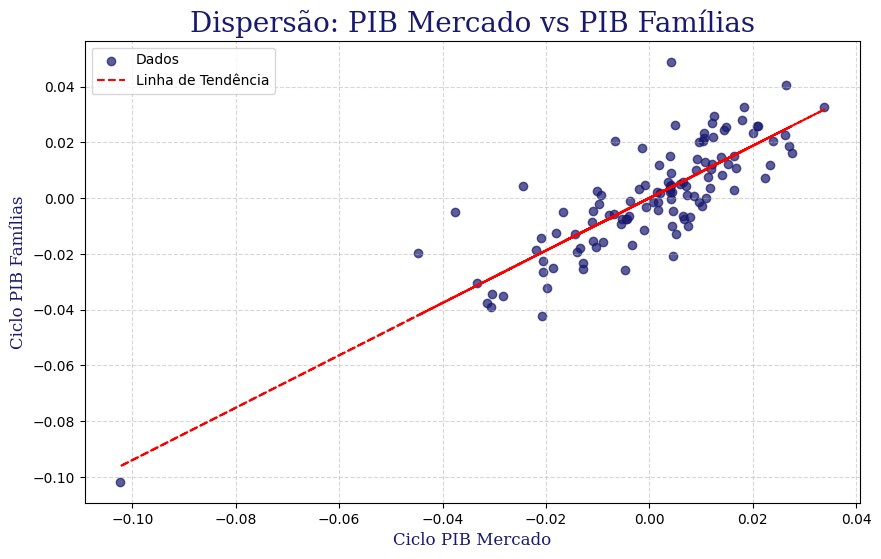

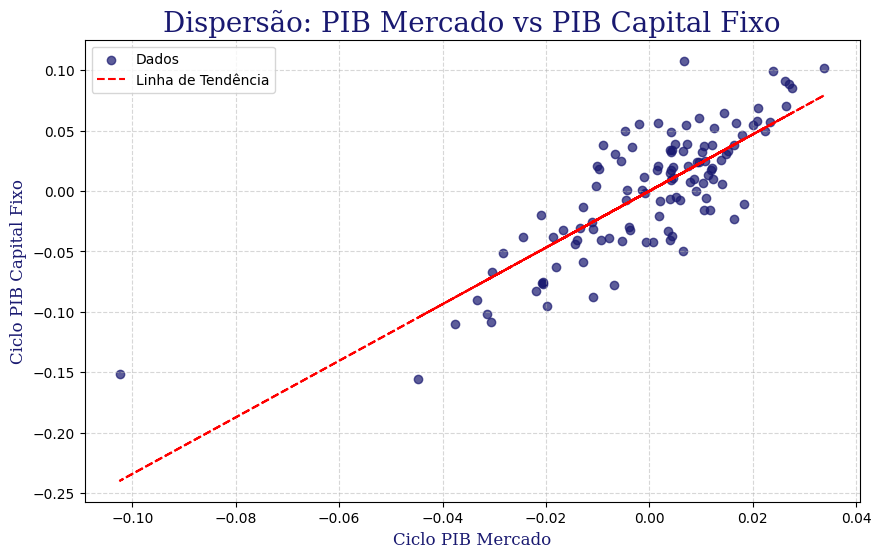

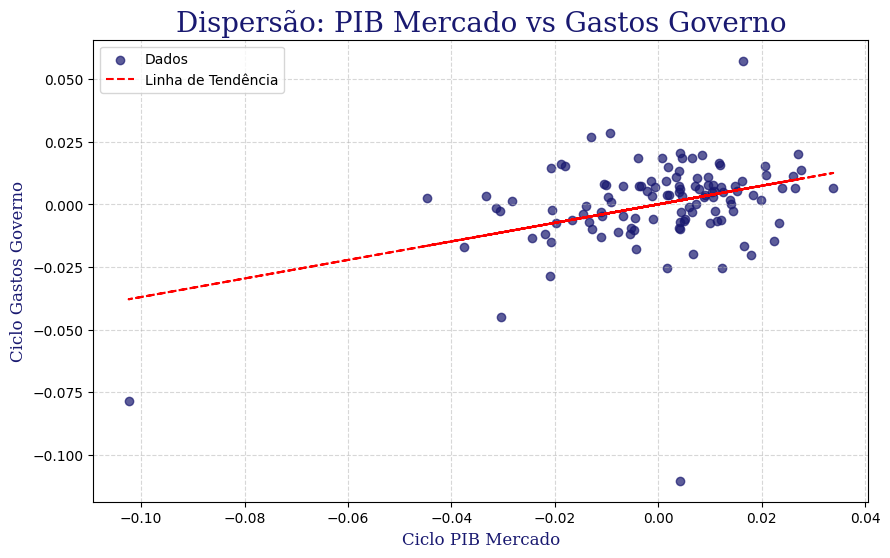

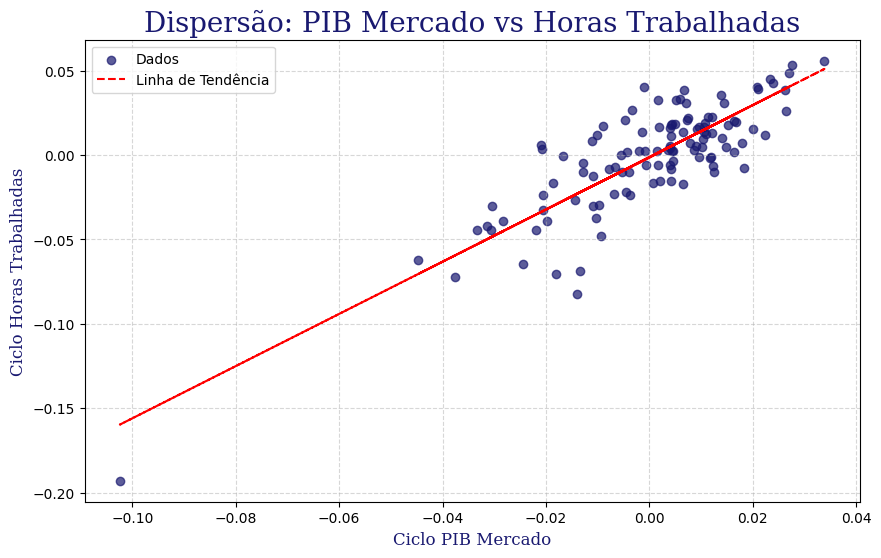

In [22]:
def plot_dispersao(x, y, titulo_x, titulo_y, titulo_grafico):
    # reta de regressão
    coef = np.polyfit(x, y, 1)  # polinômio de grau 1
    linha_tendencia = np.poly1d(coef)

    # Gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='midnightblue', alpha=0.7, label='Dados')
    plt.plot(x, linha_tendencia(x), color='red', linestyle='--', label='Linha de Tendência')
    plt.title(titulo_grafico, fontdict={'family':'serif','color':'midnightblue','size':20})
    plt.xlabel(titulo_x, fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.ylabel(titulo_y, fontdict={'family':'serif','color':'midnightblue','size':12})
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Aplicando a função de dispersão para cada série
plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_familias_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo PIB Famílias', 'Dispersão: PIB Mercado vs PIB Famílias')

plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_capital_fixo_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo PIB Capital Fixo', 'Dispersão: PIB Mercado vs PIB Capital Fixo')

plot_dispersao(df['PIB_Mercado_ciclo'], df['PIB_gastos_gov_ciclo'], 
                 'Ciclo PIB Mercado', 'Ciclo Gastos Governo', 'Dispersão: PIB Mercado vs Gastos Governo')

plot_dispersao(df['PIB_Mercado_ciclo'], df['horas_trabalhadas_ciclo'], 
               'Ciclo PIB Mercado', 'Ciclo Horas Trabalhadas', 'Dispersão: PIB Mercado vs Horas Trabalhadas')

***PIB a preços de Mercado e a prociclicalidade com:***
- Consumo familiar - positivamente relacionadas, logo são pro-cíclicas, o aumento do PIB Mercado é acompanhado pelo aumento do PIB Consumo familiar;
- Formação Bruta de capital fixo também é pro-cíclico;
- Soma das horas trabalhadas é pro-cíclica (positivamente relacionada ao PIB);
- Gastos da administração pública, pro-cíclico, mas com inclinação mais leve que as séries comparadas anteriormente


### iv. Agora faça uma tabela para os componentes cíclicos das séries, como vista em sala de aula, para isso calcule as seguintes estatísticas:
- (i) correlação com a parte cíclica do
PIB
- (ii) desvio padrão da parte cíclica das séries (o desvio padrão é uma medida de volatilidade)
- (iii) desvio padrão da série relativo ao PIB.
-----
- O que você pode dizer sobre os resultados?
- Quais variáveis são procíclicas e quais são contracíclicas?
- Quais variáveis são mais volatéis que o PIB?
- Como você explicaria os resultados para a volatilidade do consumo e do investimento em relação à volatilidade do PIB?


In [ ]:
# Criar um DataFrame para armazenar os resultados
resultados = pd.DataFrame(index=['PIB Famílias', 'PIB Capital Fixo', 'Gastos Governo', 'Horas Trabalhadas'],
                          columns=['Correlação com PIB', 'Desvio Padrão', 'Desvio Relativo ao PIB'])

# Calcular estatísticas
resultados.loc['PIB Famílias', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_familias_ciclo'])
resultados.loc['PIB Famílias', 'Desvio Padrão'] = df['PIB_familias_ciclo'].std()
resultados.loc['PIB Famílias', 'Desvio Relativo ao PIB'] = resultados.loc['PIB Famílias', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['PIB Capital Fixo', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_capital_fixo_ciclo'])
resultados.loc['PIB Capital Fixo', 'Desvio Padrão'] = df['PIB_capital_fixo_ciclo'].std()
resultados.loc['PIB Capital Fixo', 'Desvio Relativo ao PIB'] = resultados.loc['PIB Capital Fixo', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['Gastos Governo', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['PIB_gastos_gov_ciclo'])
resultados.loc['Gastos Governo', 'Desvio Padrão'] = df['PIB_gastos_gov_ciclo'].std()
resultados.loc['Gastos Governo', 'Desvio Relativo ao PIB'] = resultados.loc['Gastos Governo', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()

resultados.loc['Horas Trabalhadas', 'Correlação com PIB'] = df['PIB_Mercado_ciclo'].corr(df['horas_trabalhadas_ciclo'])
resultados.loc['Horas Trabalhadas', 'Desvio Padrão'] = df['horas_trabalhadas_ciclo'].std()
resultados.loc['Horas Trabalhadas', 'Desvio Relativo ao PIB'] = resultados.loc['Horas Trabalhadas', 'Desvio Padrão'] / df['PIB_Mercado_ciclo'].std()


print("Tabela de Estatísticas dos Componentes Cíclicos:")
display(resultados)

print("\nInterpretação:")
print("1. Variáveis com correlação positiva são pró-cíclicas, enquanto as com correlação negativa são contracíclicas.")
print("2. O desvio padrão relativo indica quais variáveis são mais voláteis que o PIB.")


Tabela de Estatísticas dos Componentes Cíclicos:


,Correlação com PIB,Desvio Padrão,Desvio Relativo ao PIB
PIB Famílias,0.832294,0.020351,1.128323
PIB Capital Fixo,0.805656,0.052439,2.907441
Gastos Governo,0.365479,0.018266,1.012775
Horas Trabalhadas,0.83794,0.03327,1.844628



Interpretação:
1. Variáveis com correlação positiva são pró-cíclicas, enquanto as com correlação negativa são contracíclicas.
2. O desvio padrão relativo indica quais variáveis são mais voláteis que o PIB.
3. Comparar os valores para consumo, investimento e horas trabalhadas.


Todas as variáveis das séries analisadas são pró-cíclicas, movendo-se na mesma direção que o PIB. O PIB Capital Fixo tem um desvio padrão de 0.052439, indicando a maior volatilidade, seguida pela variável das horas trabalhadas, refletindo a sensibilidade do investimento às condições econômicas e como as horas trabalhadas respondem rapidamente às mudanças na demanda. Enquanto o consumo das famílias é menos volátil que o investimento, uma vez que as necessidades básicas de consumo, como alimentos, itens de higiene pessoal e vestuário, tendem a ser mais estáveis, independentemente das condições econômicas. 